In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import ParameterGrid, train_test_split
import seaborn as sns


In [2]:
total_data=pd.read_csv("../data/processed/final_data.csv")
total_data.head()

,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,month,mocodes_desc
0,2020-01-08,2230,0,0,36,0,0,0,0,0,0,34.0141,-118.2978,0,0,0
1,2020-01-01,330,1,0,25,1,1,1,1,1,1,34.0459,-118.2545,0,0,1
2,2020-01-01,1730,2,1,76,0,2,2,2,1,2,34.1685,-118.4019,0,0,2
3,2020-01-01,415,3,2,31,2,3,3,2,1,3,34.2198,-118.4468,0,0,3
4,2020-01-01,30,1,3,25,0,1,4,1,1,4,34.0452,-118.2534,0,0,4


In [3]:
theft=total_data[total_data['crm_cd_desc'].isin([4,5,8,14,19,20,37,54,64,70,
                                                 101,107,111,115,117])]

In [8]:
theft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58633 entries, 5 to 320436
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_occ      58633 non-null  object 
 1   time_occ      58633 non-null  int64  
 2   area_name     58633 non-null  int64  
 3   crm_cd_desc   58633 non-null  int64  
 4   vict_age      58633 non-null  int64  
 5   vict_sex      58633 non-null  int64  
 6   vict_descent  58633 non-null  int64  
 7   premis_desc   58633 non-null  int64  
 8   weapon_desc   58633 non-null  int64  
 9   status_desc   58633 non-null  int64  
 10  location      58633 non-null  int64  
 11  lat           58633 non-null  float64
 12  lon           58633 non-null  float64
 13  weekday       58633 non-null  int64  
 14  month         58633 non-null  int64  
 15  mocodes_desc  58633 non-null  int64  
dtypes: float64(2), int64(13), object(1)
memory usage: 7.6+ MB


In [9]:
theft=theft[['lat','lat','area_name']]

In [11]:
X = theft
X_train, X_test = train_test_split(X, test_size=0.2, random_state=14)

In [12]:
model = KMeans(n_clusters = 10,n_init="auto", random_state = 14)
model.fit(X_train)

KMeans(n_clusters=10, n_init='auto', random_state=14)

In [13]:
y_train = model.labels_

In [14]:
y_test = model.predict(X_test)

In [15]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
y_pred = knn_model.predict(X_train)

In [17]:
accuracy_score(y_train, y_pred)

1.0

In [18]:
y_pred_test = knn_model.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred_test)

1.0

In [20]:
best_accuracy = 0
best_combination = None

param_grid  = {
    "n_neighbors":[3,5,7],
    "weights": ["uniform","distance"],
    "algorithm": ["auto", "kd_tree", "brute"], 
    'metric':["euclidean"]#,"manhattan","cityblock","minkowski"
    
}

for combination in ParameterGrid(param_grid):
    model = KNeighborsClassifier(**combination)
    print(model)
    model.fit(X_train, y_train)   
    y_pred = model.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    print("Combination:", combination)
    print("Accuracy:", acc)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_combination = combination
        
print("Best Combination:", best_combination)
print("Best Accuracy:", best_accuracy)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)
Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 1.0
KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')
Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 1.0
KNeighborsClassifier(metric='euclidean')
Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 1.0
KNeighborsClassifier(metric='euclidean', weights='distance')
Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 1.0
KNeighborsClassifier(metric='euclidean', n_neighbors=7)
Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 1.0
KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')
Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors':

In [21]:
best_combination

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 3,
 'weights': 'uniform'}

In [22]:
best_model = KNeighborsClassifier(**best_combination)
best_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [23]:
y_pred = best_model.predict(X_train)

In [24]:
accuracy_score(y_train, y_pred)

1.0

In [25]:
y_pred_test = best_model.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred_test)

1.0

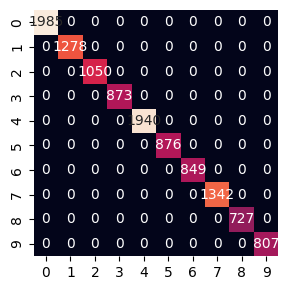

In [27]:

bank_cm = confusion_matrix(y_test, y_pred_test)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()